# <u><center>🔹*Project Title : FAKE JOB*🔹</center></u>

### Problem Description  
With the rapid growth of technology and online job portals, employment opportunities have expanded significantly. However, this has also led to an increase in fraudulent job postings that exploit job seekers. Identifying and preventing such scams is essential to ensure trust and safety in the online recruitment process.  

### Dataset Overview  
The dataset, sourced from Kaggle, contains over 18,000 job postings, including both genuine and fraudulent listings. It consists of multiple attributes such as job title, location, company profile, department, salary range, employment type, and job description. Each record is labeled as real or fake, making it suitable for analyzing patterns and developing fraud detection systems.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [3]:
df = pd.read_csv(r"C:\Users\PC\Desktop\ml\fake_job_postings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
df.head()

Number of rows: 17880
Number of columns: 18


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### CHECK MISSING VALUES

In [7]:
# Check how many missing values are in each column
print(df.isnull().sum())

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


### HEATMAP FOR MISSING VALUES

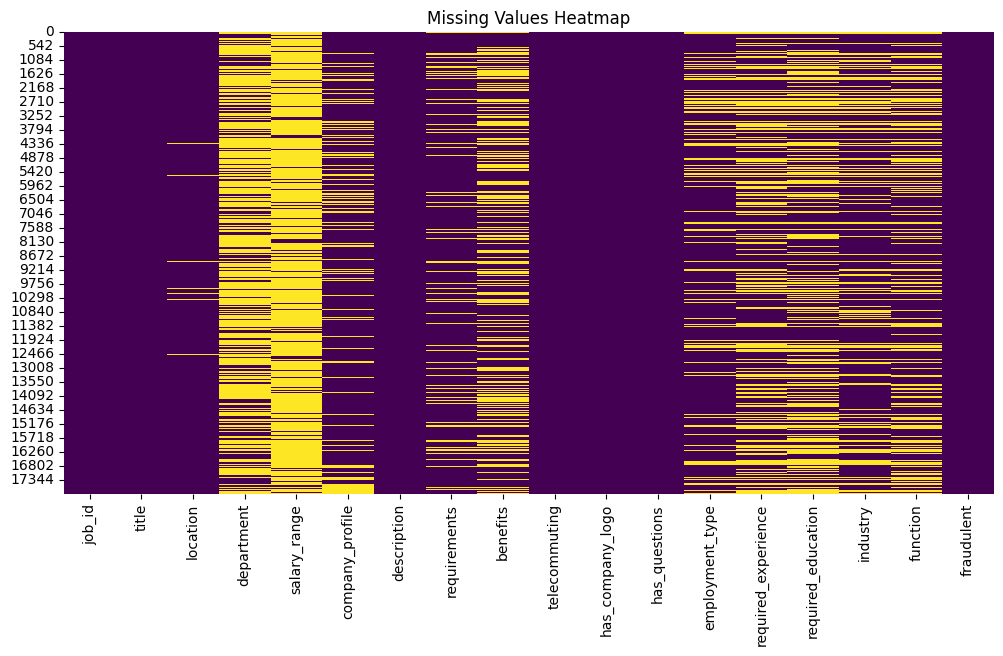

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### CONVERTING SALARY_RANGE TO MIN_SALARY AND MAX_SALARY 

In [11]:
# Function to check if salary is valid
def is_valid_salary(s):
    if pd.isna(s) or str(s).lower() == 'not provided':
        return True  # Treat missing as valid for now
    s = str(s).replace(',', '').strip()
    if '-' in s:
        min_s, max_s = s.split('-')
        return min_s.strip().isdigit() and max_s.strip().isdigit()
    return s.isdigit()

# Keep only valid rows
df = df[df['salary_range'].apply(is_valid_salary)].reset_index(drop=True)

In [13]:
import pandas as pd

# --- Function to extract min and max salary ---
def extract_salary_range(s):
    if pd.isna(s) or str(s).lower() == 'not provided':
        return 0, 0
    s = str(s).replace(',', '').strip()
    if '-' in s:
        min_s, max_s = s.split('-')
        return int(min_s.strip()), int(max_s.strip())
    # If single value, min and max are the same
    return int(s), int(s)

# --- Apply function and create new columns ---
df[['min_salary', 'max_salary']] = df['salary_range'].apply(lambda x: pd.Series(extract_salary_range(x)))

# --- Drop the original salary_range column ---
df.drop('salary_range', axis=1, inplace=True)

# --- Replace 0s with NaN for proper imputation ---
df['min_salary'].replace(0, pd.NA, inplace=True)
df['max_salary'].replace(0, pd.NA, inplace=True)

# --- Fill missing values with median ---
df['min_salary'].fillna(df['min_salary'].median(), inplace=True)
df['max_salary'].fillna(df['max_salary'].median(), inplace=True)

# --- Check the result ---
print(df[['min_salary', 'max_salary']].head())
print(df[['min_salary', 'max_salary']].info())


   min_salary  max_salary
0     40000.0     52000.0
1     40000.0     52000.0
2     40000.0     52000.0
3     40000.0     52000.0
4     40000.0     52000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17854 entries, 0 to 17853
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   min_salary  17854 non-null  float64
 1   max_salary  17854 non-null  float64
dtypes: float64(2)
memory usage: 279.1 KB
None


### FILLING MISSING VALUES

In [65]:
# Fill text-based / categorical columns with placeholders
df['location'].fillna("Unknown", inplace=True)
df['department'].fillna("Unknown", inplace=True)
df['company_profile'].fillna("Not Provided", inplace=True)
df['description'].fillna("No Description", inplace=True)
df['requirements'].fillna("Not Provided", inplace=True)
df['benefits'].fillna("Not Provided", inplace=True)
df['employment_type'].fillna("Unknown", inplace=True)
df['required_experience'].fillna("Not Mentioned", inplace=True)
df['required_education'].fillna("Not Mentioned", inplace=True)
df['industry'].fillna("Unknown", inplace=True)
df['function'].fillna("Unknown", inplace=True)

In [67]:
# Check how many missing values are in each column
print(df.isnull().sum())

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
min_salary             0
max_salary             0
dtype: int64


### CHECKING FOR OUTLIERS

Min Salary Outliers: 2452
Max Salary Outliers: 2695


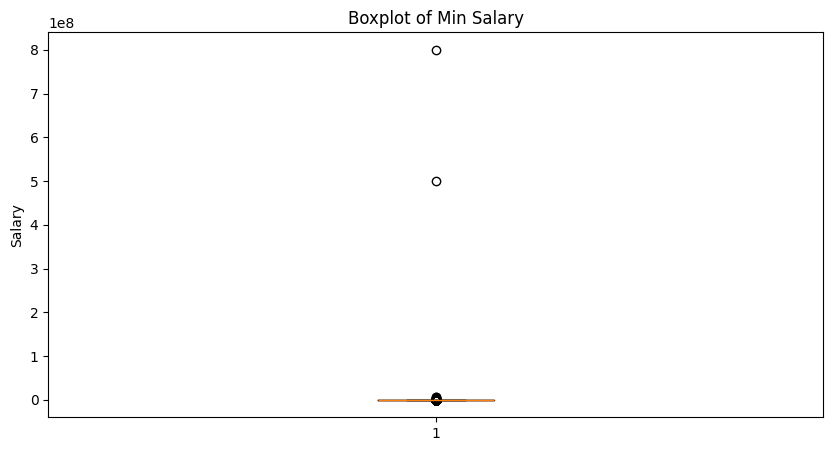

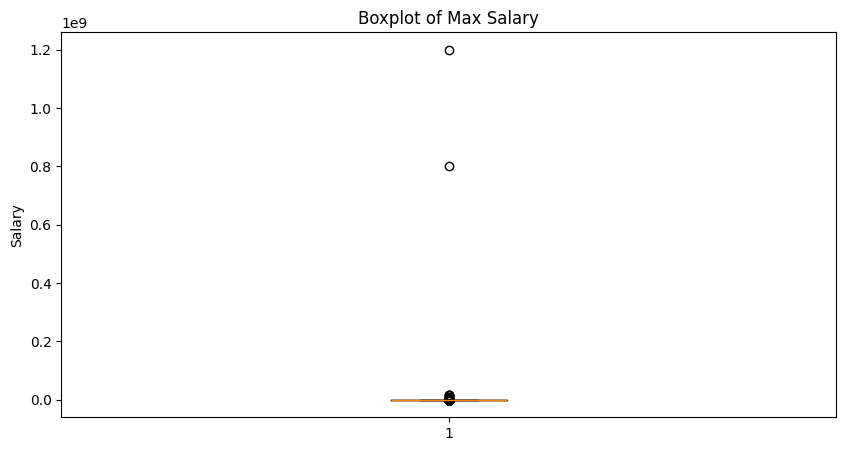

In [25]:
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return boolean series where True indicates an outlier
    return (series < lower_bound) | (series > upper_bound)

# Detect outliers
min_salary_outliers = detect_outliers(df['min_salary'])
max_salary_outliers = detect_outliers(df['max_salary'])

# Print number of outliers
print("Min Salary Outliers:", min_salary_outliers.sum())
print("Max Salary Outliers:", max_salary_outliers.sum())

# Boxplot for min_salary
plt.figure(figsize=(10, 5))
plt.boxplot(df['min_salary'])
plt.title('Boxplot of Min Salary')
plt.ylabel('Salary')
plt.show()

# Boxplot for max_salary
plt.figure(figsize=(10, 5))
plt.boxplot(df['max_salary'])
plt.title('Boxplot of Max Salary')
plt.ylabel('Salary')
plt.show()


### HANDLING OUTLIERS

Shape after removing outliers: (15154, 19)


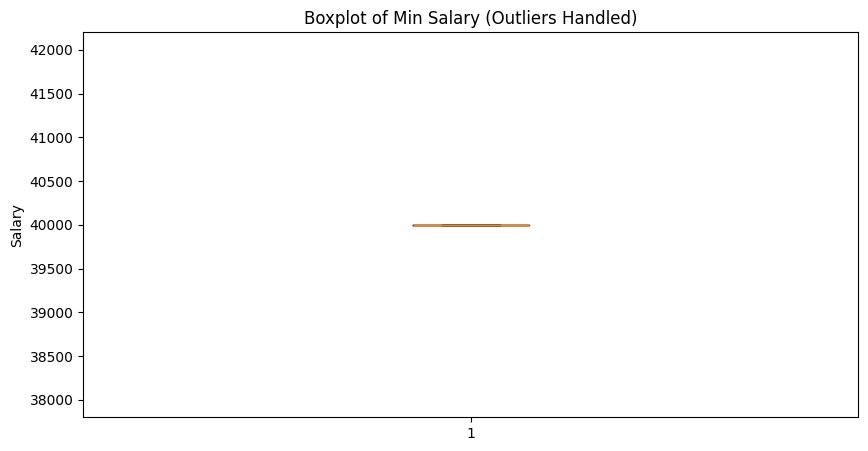

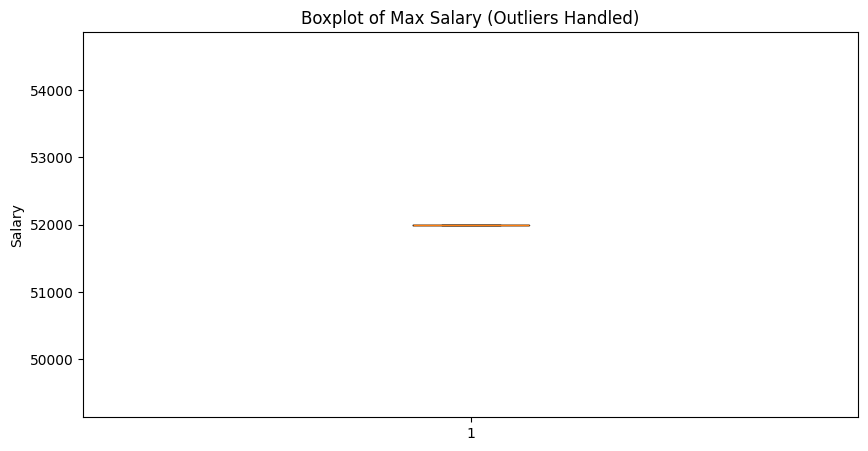

In [27]:
import matplotlib.pyplot as plt

# --- Step 1: Detect and remove outliers using IQR ---
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Keep rows within bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for min_salary and max_salary
df_clean = remove_outliers(df, 'min_salary')
df_clean = remove_outliers(df_clean, 'max_salary')

print("Shape after removing outliers:", df_clean.shape)

# --- Step 2: Boxplots to visualize salaries ---
plt.figure(figsize=(10, 5))
plt.boxplot(df_clean['min_salary'], flierprops=dict(marker='o', color='red', alpha=0.3, markersize=4))
plt.title('Boxplot of Min Salary (Outliers Handled)')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(df_clean['max_salary'], flierprops=dict(marker='o', color='red', alpha=0.3, markersize=4))
plt.title('Boxplot of Max Salary (Outliers Handled)')
plt.ylabel('Salary')
plt.show()


### TOP 10 JOB TITLES

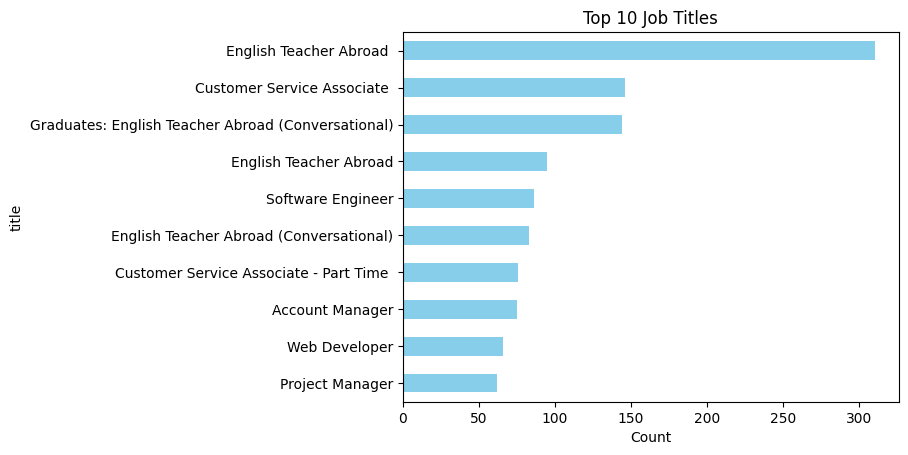

In [29]:
df['title'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.xlabel("Count")
plt.title("Top 10 Job Titles")
plt.gca().invert_yaxis()
plt.show()

### TOP 10 JOB LOCATIONS

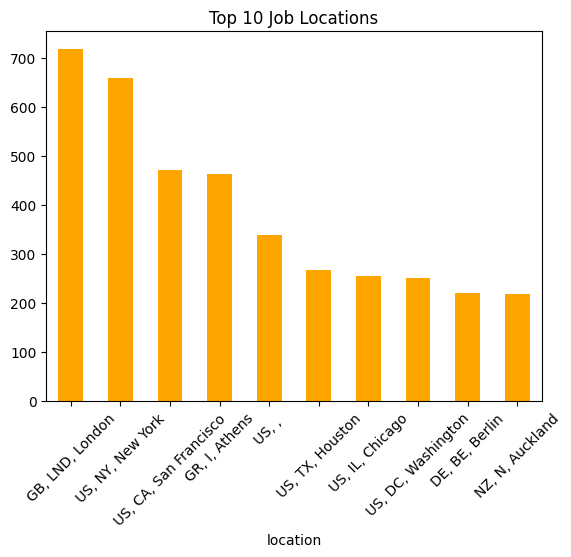

In [31]:
df['location'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Job Locations")
plt.xticks(rotation=45)
plt.show()

### EMPLOYMENT TYPE VS FRAUDULENT

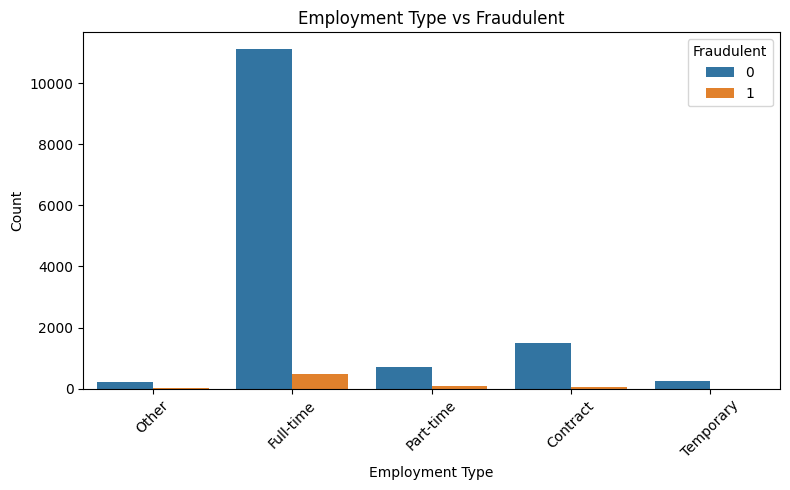

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='employment_type', hue='fraudulent')
plt.title('Employment Type vs Fraudulent')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Fraudulent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### EXPERIENCE LEVEL VS FRAUDULENT POSTINGS

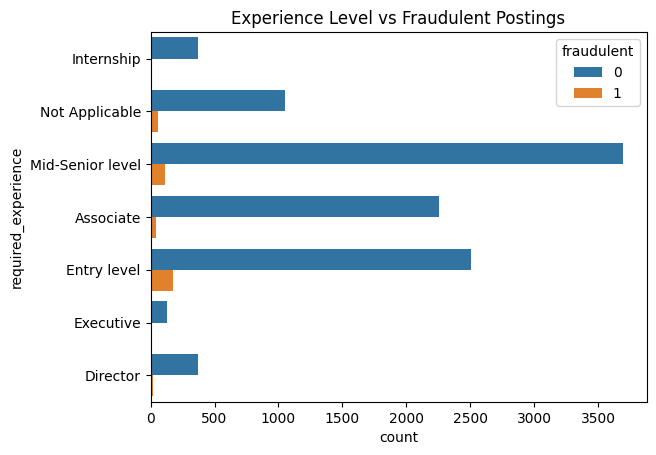

In [35]:
sns.countplot(data=df, y='required_experience', hue='fraudulent')
plt.title("Experience Level vs Fraudulent Postings")
plt.show()

### SPLITTING DATA INTO TEST AND TRAIN

In [37]:
# Separate features and target
X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shape
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (14283, 18)
Test set size: (3571, 18)


### MODEL TRAINING 

In [39]:
# Encode categorical features using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure both train and test have same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# 1️⃣ Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_encoded, y_train)
print("✅ Logistic Regression model trained successfully!")

✅ Logistic Regression model trained successfully!


In [40]:
# 2️⃣ Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_encoded, y_train)
print("✅ Decision Tree model trained successfully!")

✅ Decision Tree model trained successfully!


In [43]:
# 3️⃣ Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_encoded, y_train)
print("✅ Random Forest model trained successfully!")

✅ Random Forest model trained successfully!


In [46]:
# 5️⃣ K-Nearest Neighbors (KNN)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train_scaled, y_train)
print("✅ K-Nearest Neighbors (KNN) model trained successfully!")


✅ K-Nearest Neighbors (KNN) model trained successfully!


In [49]:
from sklearn.metrics import accuracy_score, f1_score, r2_score

# Make predictions on test set
y_pred_log = log_model.predict(X_test_encoded)
y_pred_dt = dt_model.predict(X_test_encoded)
y_pred_rf = rf_model.predict(X_test_encoded)
y_pred_knn = knn_model.predict(X_test_scaled)  # Note: KNN uses scaled features

# Function to print metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print("\n")

# Evaluate all models
print_metrics("Logistic Regression", y_test, y_pred_log)
print_metrics("Decision Tree", y_test, y_pred_dt)
print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("K-Nearest Neighbors (KNN)", y_test, y_pred_knn)


--- Logistic Regression ---
Accuracy: 0.9537944553346401
F1 Score: 0.0
R² Score: -0.05452726452712131


--- Decision Tree ---
Accuracy: 0.990758891066928
F1 Score: 0.8958990536277602
R² Score: 0.7890945470945757


--- Random Forest ---
Accuracy: 0.9871184542145057
F1 Score: 0.8368794326241135
R² Score: 0.7060105807984995


--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.9599551946233548
F1 Score: 0.22702702702702707
R² Score: 0.08607637074316143




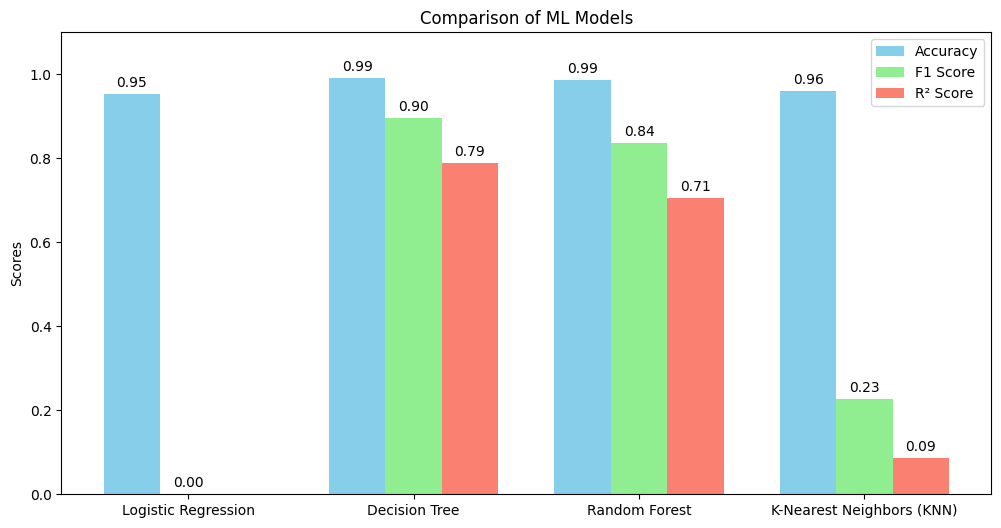

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors (KNN)']
accuracy = [0.9538, 0.9908, 0.9871, 0.9600]
f1_score_vals = [0.0, 0.8959, 0.8369, 0.2270]
r2_score_vals = [-0.0545, 0.7891, 0.7060, 0.0861]

x = np.arange(len(models))  # label locations
width = 0.25  # width of bars

fig, ax = plt.subplots(figsize=(12,6))

# Plot bars
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x, f1_score_vals, width, label='F1 Score', color='lightgreen')
rects3 = ax.bar(x + width, r2_score_vals, width, label='R² Score', color='salmon')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Comparison of ML Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add text labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

plt.ylim(0,1.1)
plt.show()


In [53]:
# Example new job posting
new_job = {
    'title': 'Data Analyst',
    'location': 'New York',
    'department': 'Analytics',
    'company_profile': 'Tech Company',
    'requirements': 'Python, SQL, Excel',
    'benefits': 'Health insurance, Paid leave',
    'has_company_logo': 1,
    'employment_type': 'Full-time',
    'required_experience': '1-3 years',
    'required_education': 'Bachelor\'s Degree',
    'industry': 'IT',
    'function': 'Analytics'
}

# Convert to DataFrame
new_job_df = pd.DataFrame([new_job])

# One-hot encode using training columns
new_job_encoded = pd.get_dummies(new_job_df)
new_job_encoded = new_job_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Predict using trained Random Forest
prediction = rf_model.predict(new_job_encoded)
prediction_proba = rf_model.predict_proba(new_job_encoded)

# Output
if prediction[0] == 1:
    print("⚠️ This job posting is likely fraudulent!")
else:
    print("✅ This job posting seems genuine.")

print("Prediction probabilities:", prediction_proba)

✅ This job posting seems genuine.
Prediction probabilities: [[0.82 0.18]]
